In [1]:
from sklearn import datasets

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns

from sklearn.decomposition import NMF
from itertools import combinations
import pandas as pd

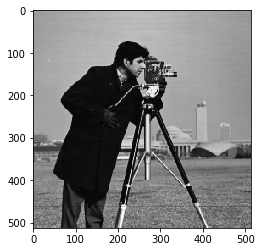

In [2]:
img = Image.open("./images/cameraman.png")
img = img.convert('L')
imshow(img, cmap='gray')

In [3]:
n_components = 40
nmf_decomposer = NMF(n_components=n_components,
                     solver = 'cd', random_state= 123)

In [4]:
%%time
X = np.asarray(img)
nmf_decomposer.fit(X)

CPU times: user 1.07 s, sys: 65.2 ms, total: 1.14 s
Wall time: 594 ms


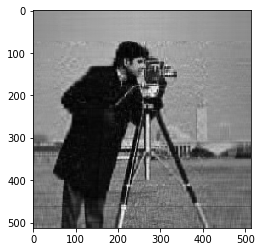

In [5]:
W = nmf_decomposer.transform(X)
H = nmf_decomposer.components_

restored_image = np.matmul(W, H)
# restored_image = np.matmul(W, H)

imshow(restored_image, cmap='gray')

In [6]:
X.shape, W.shape, H.shape

((513, 513), (513, 40), (40, 513))

In [7]:
compression_ratio = 2 *(W.shape[0] * W.shape[1])/ (X.shape[0] * X.shape[1])
compression_ratio

0.15594541910331383

### Deciding number of components

In [ ]:
def logSRR(S, R):
    return 20 * np.log(
        (np.sqrt(np.mean(S**2))) / (np.sqrt(np.mean(R**2)))
    )

In [ ]:
scree_plot_data = []

for i in range(2, 50):
        nmf_ = NMF(n_components=i,
                             solver = 'cd', verbose = 0)
        nmf_.fit(X)
        W = nmf_.transform(X)
        H = nmf_.components_
        scree_plot_data.append((i, logSRR(X, np.matmul(W, H))))

        
scree_plot_data = pd.DataFrame(scree_plot_data)
scree_plot_data.columns = ['n_components', 'logSRR']

In [ ]:
plt.figure()
sns.lineplot(x='n_components', y='logSRR', data=scree_plot_data, )